# ML for astronomy

Name- Aman Kumar

Username- amankuma

In [61]:
# importing libraries and image file #
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.io
from copy import deepcopy
june = scipy.io.loadmat('june.mat')
dec = scipy.io.loadmat('december.mat')
june=june['june']
dec=dec['december']

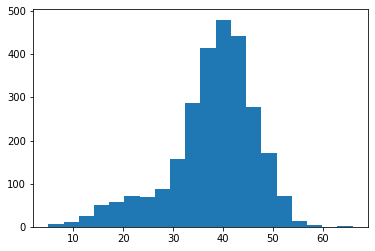

In [62]:
#histogram of the disparity along X-axis
june_x=june[:,0]
dec_x=dec[:,0]
#dec_x
disp=dec_x-june_x  #disparity vector
plt.hist(disp,bins=20)
plt.show()

In [63]:
print(disp.shape)
print(len(disp))

(2700,)
2700


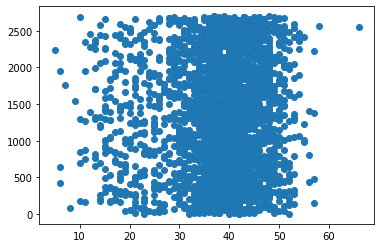

In [64]:
# scatter plot of disparity matrix for visualiztion purposes
plt.scatter(disp, np.arange(2700))

In [65]:
## K means for 1 dimensionl data ##

[45.1057736387245, 21.203443421332917] Old means
[41.53454894 25.45292208] New means
[41.534548944337814, 25.45292207792208] Old means
[41.55447915 25.49424176] New means
[41.55447915016523, 25.494241756620003] Old means
[41.55448871 25.49430883] New means
[41.554488713603725, 25.494308834020487] Old means
[41.55448872 25.49430894] New means
[41.55448871819271, 25.494308942912372] Old means
[41.55448872 25.49430894] New means
[41.55448871819491, 25.494308943089145] Old means
[41.55448872 25.49430894] New means
[41.55448871819491, 25.49430894308943] Old means
[41.55448872 25.49430894] New means
The final cluster means  [41.55448872 25.49430894]
Kmeans coverged in  7  steps


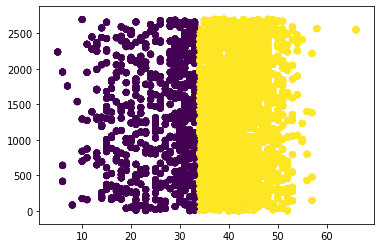

In [66]:
k=2 # number of clusters
from random import random
#cent_vect = np.random.rand(max)

cent_vect = [min(disp) + (random() * (max(disp) - min(disp))) for i in range(k)]

#randomly initialising cluster cetroids
#cent_vect=np.random.choice(disp,k)
# The 2 means shouldn't be same
while cent_vect[0]==cent_vect[1]:
    cent_vect = [min(disp) + (random() * (max(disp) - min(disp))) for i in range(k)]
    #cent_vect=np.random.choice(disp,k)

membership_matrix= np.zeros((len(disp),k))

dist=np.zeros((len(disp),k))

means=np.zeros(2)

error= means-cent_vect

iterations=0

while np.sum(error) != 0:
    for j in range(k):    
        for i in range(len(disp)):
            dist[i,j]=abs(disp[i]-cent_vect[j])

    #print(dist)
   

    for i in range(len(disp)): 
            if dist[i][0]<dist[i][1]:
                membership_matrix[i][0]=1  #Belongs to 1st cluster
                membership_matrix[i][1]=0
            else:
                membership_matrix[i][0]=0  #Belongs to 2nd cluster
                membership_matrix[i][1]=1
                
    
    
    for i in range(len(disp)):
        if membership_matrix[i][0]==1:
            means[0]+=disp[i]       # mean of data points belonging to cluster 1
    for i in range(len(disp)):
        if membership_matrix[i][1]==1:
            means[1]+=disp[i]       # mean of data points belonging to cluster 2
    means[0] = means[0]/sum(membership_matrix[:,0])
    means[1] = means[1]/sum(membership_matrix[:,1])
    print(cent_vect,"Old means")
    print(means,"New means")
    #means[0] = np.sum([i for i in membership_matrix[:,0] if i == 1])/np.sum(membership_matrix[:,0])
    #means[1] = np.sum([i for i in membership_matrix[:,1] if i == 1])/np.sum(membership_matrix[:,1])
    
    #print(membership_matrix)
    error= means-cent_vect
    # Assiging values of new means to old means
    for j in range(k):
        cent_vect[j]=means[j]
        
    cls = [1 if membership_matrix[i,0] else 0 for i in range(len(membership_matrix))]
    plt.scatter(disp, np.arange(2700), c = cls)
    iterations+=1
print("The final cluster means ",means)   
print("Kmeans coverged in ",iterations," steps")
        

From the above figure and seeing the centroid means I can see 2 clusters. One cluster with mean around 24.4 and other with 41.24. The cluster with centroid mean of around 20's depicts stars from another galaxy whereas the cluster with highr disparity mean depicts stars from our own galaxy. This is because the stars from our galaxy will have more displacement (on the horizontal axis) over 6 months tenure since they are nearer to our planet hence resulting in a greater parallax, as compared to stars far off from us. I feel the K means does a good job in creating the clusters, though some times its reesults are better as compared to some other times (The issue of ucertaninty with Kmeans).

In [67]:

cluster1=[]
for i in range(len(membership_matrix[:,0])):
    if membership_matrix[i][0]==1:
        cluster1.append(disp[i])
cluster1=np.array(cluster1)
#print(cluster1)    # data points belonging to cluster1

In [68]:
cluster1.shape

(2084,)

In [69]:
# data points for cluster 2
cluster2=[]
for i in range(len(membership_matrix[:,1])):
    if membership_matrix[i][1]==1:
        cluster2.append(disp[i])
cluster2=np.array(cluster2)          # data points belonging to cluster2
#print(cluster2)             

In [70]:
cluster2.shape

(616,)

# GMM for Parallax

(2700,)
2700


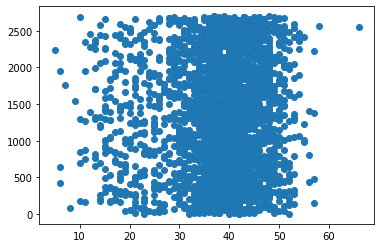

In [71]:
print(disp.shape)
print(len(disp))
plt.scatter(disp, np.arange(2700))

In [72]:
# Initialisation
J=2
means= means              # means
var_j1= np.var(cluster1)  # variance for cluster 1
var_j2= np.var(cluster2)  # variance for cluster 2
var=np.array([var_j1,var_j2])
diff1=np.array(disp-means[0])
diff2=disp-means[1]
diff1=diff1.reshape(1,diff1.shape[0])
diff2=diff2.reshape(1,diff2.shape[0])
diff=np.concatenate((diff1,diff2),axis=0)   # X-mu matrix
# Cluster probability
Pj1= len(cluster1)/len(disp)
Pj2=len(cluster2)/len(disp)
Pj=np.array([Pj1,Pj2])
# Calculating PDF of 1-D data
U_temp= np.zeros((len(disp),J))
for i in range(len(disp)):
    for j in range(J):
        U_temp[i,j]= Pj[j]*((1/(math.sqrt(2*math.pi*var[j]))*math.exp((-0.5)*(disp[i]-means[j])**2/var[j])))
A=np.sum(U_temp,axis=1)
A=A.reshape(2700,1)
U=np.divide(U_temp,A) #U matrix

In [73]:
print(U)
print(U.shape)

[[0.98021495 0.01978505]
 [0.9906493  0.0093507 ]
 [0.9906493  0.0093507 ]
 ...
 [0.93127486 0.06872514]
 [0.99841076 0.00158924]
 [0.97044642 0.02955358]]
(2700, 2)


In [74]:
# M step

s=0
while s<=100 :
    means_new=U.T@disp.reshape(2700,1)
    means_new=np.divide(means_new.T,np.sum(U,axis=0))
#     print(means_new.shape)
#     print(means_new)
    Pj_new= np.divide(np.sum(U,axis=0),len(disp))
#     print(Pj_new)

    diff1=disp-means_new[:,0]
    var_new1=U[:,0]@(diff1**2)/(np.sum(U[:,0],axis=0))

    diff2=disp-means_new[:,1]
    var_new2=U[:,1]@(diff2**2)/(np.sum(U[:,1],axis=0))

    var_new=np.array([var_new1,var_new2])
    # diff1=diff1.reshape(1,diff1.shape[0])
    # diff2=diff2.reshape(1,diff2.shape[0])
    # diff=np.concatenate((diff1,diff2),axis=0)

    # calculating new membership matrix # E step
    U_temp= np.zeros((len(disp),J))
    for i in range(len(disp)):
        for j in range(J):
            U_temp[i,j]= Pj_new[j]*((1/(math.sqrt(2*math.pi*var_new[j]))*math.exp((-0.5)*(disp[i]-means_new[:,j])**2/var_new[j])))
    B=np.sum(U_temp,axis=1)
    B=B.reshape(2700,1)
    U=np.divide(U_temp,B) #U matrix
    #print("a")
    error= means-means_new
    if np.sum(error)==0:
        break
    
        # Assiging values of new means to old means
    for j in range(J):
        means[j]=means_new[:,j]
    s+=1 
#print("iterations",s)
print("centroids",means_new)
print("variances",var_new)
print("probabilities of each cluster",Pj_new)

centroids [[40.1548605  20.85611065]]
variances [34.12425382 34.54648405]
probabilities of each cluster [0.88137548 0.11862452]


The GMM also gives similar results as compared to Kmeans but I feel these reults are more accurate. This is because as it can be seen from disparity matrix histogram, its a multimodal distribution with 2 gaussians: one with mean at around 21 and another at 40. This information is correctly utilized by GMM and it forms two clusters taking into account the two distributions. The first distribution (with mean around 20) forms the first cluster of stars from distant galaxy and the second distribution (with mean around 40) forms the second cluster depicting stars from our own galaxy.